# Umetnost

Projekt pri predmetu programiranje 1 z namenom analize podatkov.

## Začetek

Uvozimo pandas in Image iz knjižnice PIL ,ki jo bomo kasneje potrebovali za prikaz slik.
Uvozimo cvs datoteke za delo s podatki in matplotlib za grafični prikaz.

In [1]:
import pandas as pd
from PIL import Image

#Razpredelnice za delo s podatki
slikarji = pd.read_csv('./csv-datoteke/seznam_slikarji.csv',sep=';',encoding='latin1',index_col='Id_slikarja')
slike = pd.read_csv('./csv-datoteke/seznam_slik.csv',sep=';',encoding='latin1',index_col='Id_slike')

#Število izpisov po stolpcih in vrsticah.
pd.options.display.max_rows = 15
pd.options.display.max_columns = 16

%matplotlib inline

import matplotlib.pyplot as plt
from pandas import DataFrame
from mpl_toolkits.mplot3d import Axes3D

pd.set_option('display.mpl_style', 'default')
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

## Tabela umetnikov
Kjer so zbrani index umetnika, ime, narodnost in obdobje.

In [2]:
slikarji

,Ime,Narodnost,Obdobje
Id_slikarja,,,
768,"CASALI, Andrea",Italian,1701-1750
4438,"VOS, Marten de",Flemish,1551-1600
766,"CARUS, Carl Gustav",German,1801-1850
1967,"HONTHORST, Gerrit van",Dutch,1601-1650
1369,"FÃNYES, Adolf",Hungarian,1851-1900
3594,"ROOS, Philipp Peter",German,1601-1650
4404,"VISSCHER, Maria Tesselschade Roemers",Dutch,1601-1650
...,...,...,...
3093,"PACHER, Friedrich",Austrian,1451-1500


## Umetniki razvrščeni po narodnosti
Največ umetnikov je bilo italjanskih, francoskih, nizozemskih,...

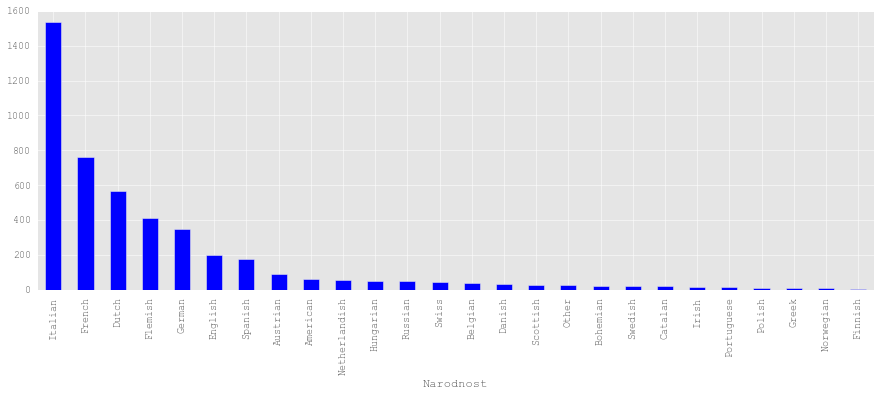

In [2]:
slikarji_po_narodnosti = slikarji.groupby('Narodnost').size().sort_values(ascending=False)
slikarji_po_narodnosti.plot(color='b',kind='bar')

## Umetniki razvrščeni po obdobjih
Kot vidimo je bil največji porast umetnosti med 1601-1650 torej v obdobju baroka.

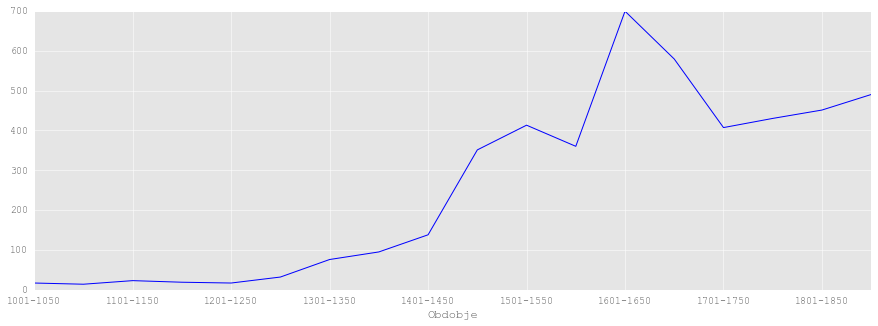

In [4]:
slikarji_po_obdobjih = slikarji.groupby('Obdobje').size()
slikarji_po_obdobjih.plot(color='b')

## Graf umetnikov razporejenih po obdobjih glede na narodnost

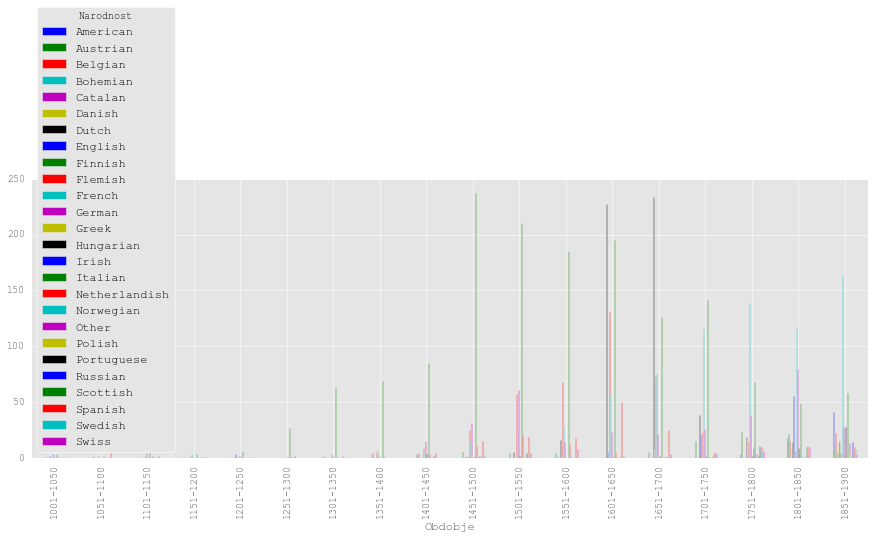

In [5]:
slikarji_glede_na_obdobje_po_narodnosti=slikarji.groupby(['Obdobje','Narodnost']).size().unstack()
slikarji_glede_na_obdobje_po_narodnosti.plot(kind='bar')

# Graf umetnikov nekega naroda po zgodovinskih obdobjih
Izberemo si nek narod (npr. Madžarski) in prikažemo aktivnost umetnikov tega naroda v posameznih zgodovinskih obdobjih.

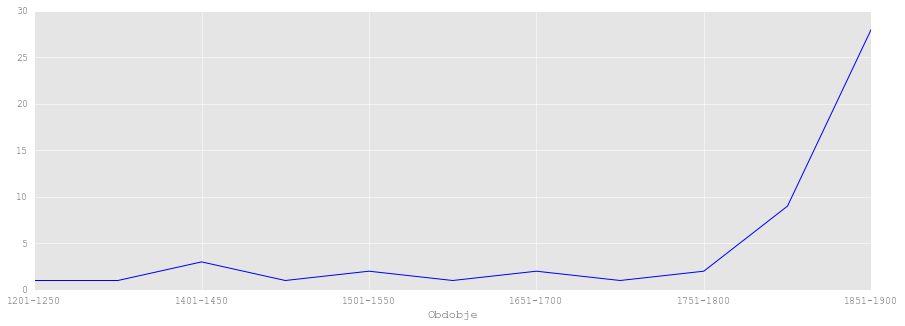

In [6]:
Narod = 'Hungarian'
Narod_slikarji=slikarji[slikarji.Narodnost==Narod]
stevilo_Narod_slikarjev_v_obdobju=Narod_slikarji.groupby('Obdobje').size()
stevilo_Narod_slikarjev_v_obdobju.plot(color='b')

## Graf umetnikov v nekem zgodovinskem obdobju
Izberemo si neko obdobje in prikažemo število umetnikov glede na narodnost v tem obdobju

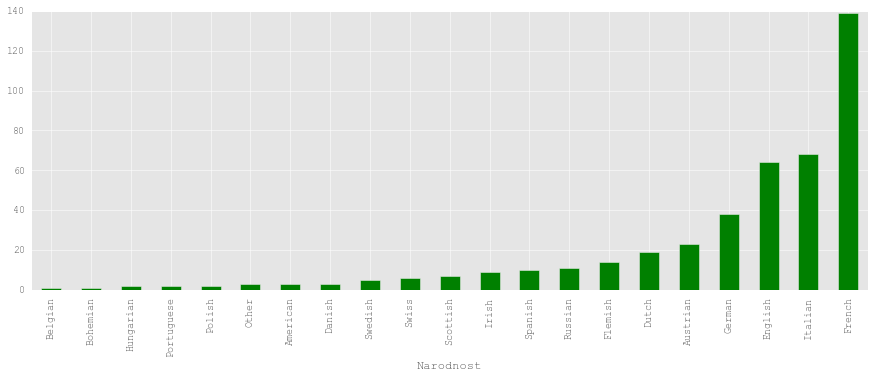

In [3]:
Obdobje='1751-1800'
Obdobje_slikarji=slikarji[slikarji.Obdobje==Obdobje]
stevilo_v_Obdobju_slikarjev_glede_na_narodnost=Obdobje_slikarji.groupby('Narodnost').size().sort_values()
stevilo_v_Obdobju_slikarjev_glede_na_narodnost.plot(color='g',kind='bar')

## Tabela umetniških del
Zbrani so podatki o naslovu dela, uporabljeni tehniki, lokaciji, kjer se delo nahaja potem obliki oz. vrsti umetniškega dela in tipa.

In [8]:
slike

,Id_slikarja,Naslov,Tehnika,Lokacija,Oblika,Tip
Id_slike,,,,,,
27811,3347,Studies of Young Women in Profile,Silverpoint and white heightening on blue prep...,"Kunsthalle, Hamburg",graphics,study
4438,608,William Vans Murray,"Oil on canvas, 76 x 64 cm","National Gallery of Art, Washington",painting,portrait
30187,3574,Capital,Stone,"Monastery, Sant Pere de Roda",sculpture,religious
25750,3097,Miracle of St Dominic,Oil on canvas,"Basilica dei Santi Giovanni e Paolo, Venice",painting,religious
3594,513,Treatise on Engraving and Etching,Engraving,"Biblioth?que Nationale, Paris",graphics,other
37601,4352,Muse with Tambourine,Fresco,"Villa Barbaro, Maser",painting,interior
11013,1354,A Studio in the Batignolles Quarter,"Oil on canvas, 204 x 274 cm","MusÃ©e d'Orsay, Paris",painting,portrait
...,...,...,...,...,...,...
24241,2854,Winter Landscape,"Oil on oak panel, 37 x 49 cm",Private collection,painting,landscape


## Graf oblik oz. vrst umetniških del
Kot vidimo so bile prevladujoče oblike ustvarjanja ravno slike.

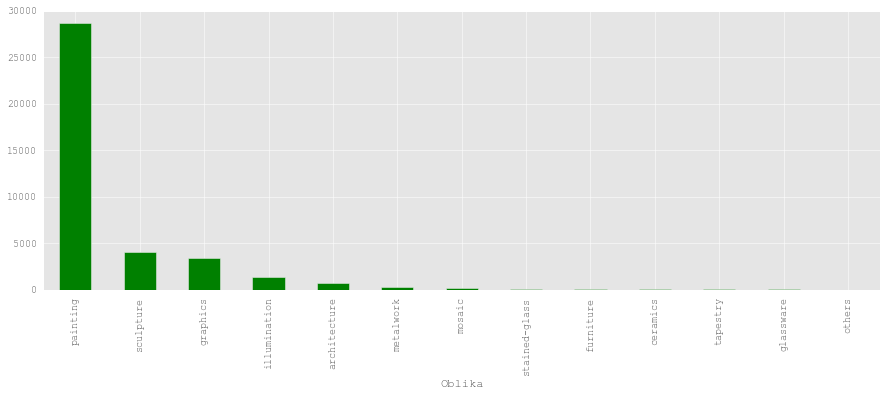

In [9]:
slike_oblika=slike.groupby('Oblika').size().sort_values(ascending=False)
slike_oblika.plot(kind='bar',color='g')

## Graf tipa umetniških del
Razvidno je da se največ umetniških del navezuje ravno na religiozne teme.

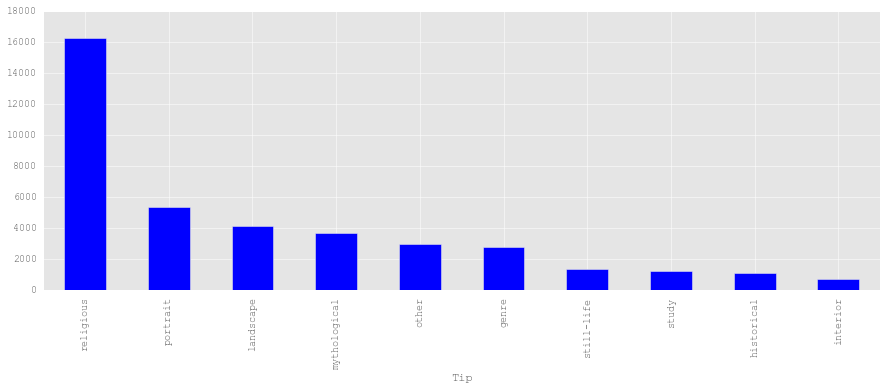

In [10]:
slike_tip=slike.groupby('Tip').size().sort_values(ascending=False)
slike_tip.plot(kind='bar',color='b')

## Graf oblik umetniških del glede na tip
Največ del je bilo slik in prevladujoča tema religija, prav tako pri kiparstvu in nekaterih drugih.
Zanimivo, da pri grafičnih delih prevladuje študija.

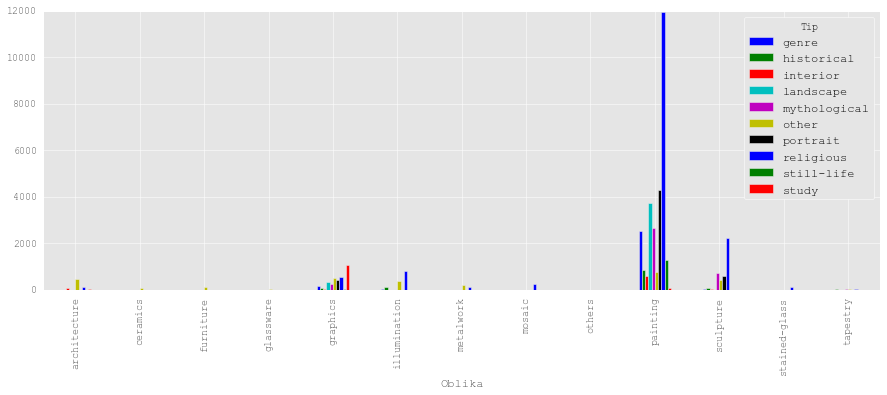

In [11]:
oblika_in_njen_tip=slike.groupby(['Oblika','Tip']).size().unstack()
oblika_in_njen_tip.plot(kind='bar')

## Največje zbirke
Največ del je v privatnih zbirkah, potem so zbrane v nekaterih bolj znanih muzejih:
* Musée du Louvre, Paris;
* The Hermitage, St. Petersburg;
* Metripolitan Museum of Art, New York;
* ...

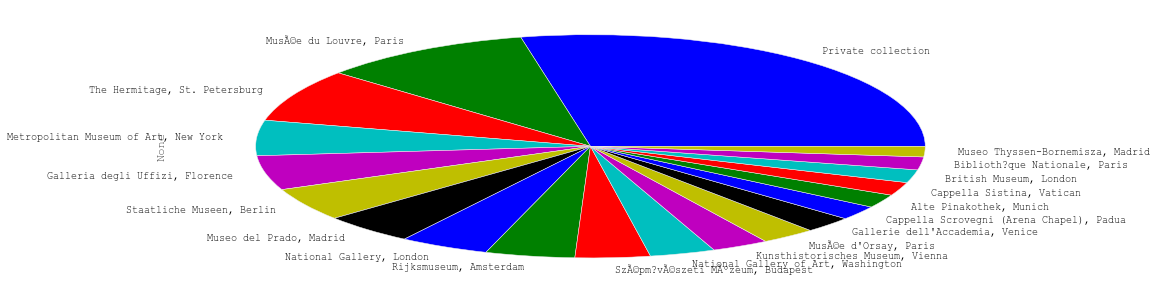

In [12]:
najvecje_zbirke_slike_lokacija=slike.groupby('Lokacija').size().sort_values(ascending=False).head(20)
najvecje_zbirke_slike_lokacija.plot(kind='pie')

## Združeni tabeli
Združimo tabeli slikarji in slike po indexu slikarja.

In [4]:
zdruzeni_tabeli=slike.join(slikarji, on='Id_slikarja')
zdruzeni_tabeli

,Id_slikarja,Naslov,Tehnika,Lokacija,Oblika,Tip,Ime,Narodnost,Obdobje
Id_slike,,,,,,,,,
3364,497,The Dissatisfied Painter (Crisis in the Life o...,"Oil on wood, 98 x 82 cm","Magyar Nemzeti GalÃ©ria, Budapest",painting,genre,"BORSOS, JÃ³zsef",Hungarian,1851-1900
3443,501,The Wayfarer (detail),Oil on panel,"Museum Boijmans Van Beuningen, Rotterdam",painting,religious,"BOSCH, Hieronymus",Netherlandish,1451-1500
23426,2820,The Black Hours,"Manuscript (M. 493), 170 x 120 mm (folio size)","The Morgan Library and Museum, New York",illumination,religious,"MINIATURIST, Flemish",Flemish,1151-1200
1278,141,Perseus,"Bronze, height 45 cm",Private collection,sculpture,mythological,"ASPETTI, Tiziano",Italian,1551-1600
8880,1130,Girl with a Hat,"Oil on canvas, 46 x 33 cm",Private collection,painting,portrait,"DEGAS, Edgar",French,1851-1900
13393,1648,Last Judgment (detail),Fresco,"Cappella Scrovegni (Arena Chapel), Padua",painting,religious,GIOTTO di Bondone,Italian,1301-1350
34499,4096,Assumption of the Virgin (detail),Oil on wood,"Santa Maria Gloriosa dei Frari, Venice",painting,religious,TIZIANO Vecellio,Italian,1501-1550
...,...,...,...,...,...,...,...,...,...
27325,3306,Angel (detail),Fresco,"San Miniato al Monte, Florence",painting,religious,"POLLAIUOLO, Antonio del",Italian,1451-1500


## Število umetniških del glede na narodnost
Največ del so ustvarili italijani potem francozi, nizozemci,...

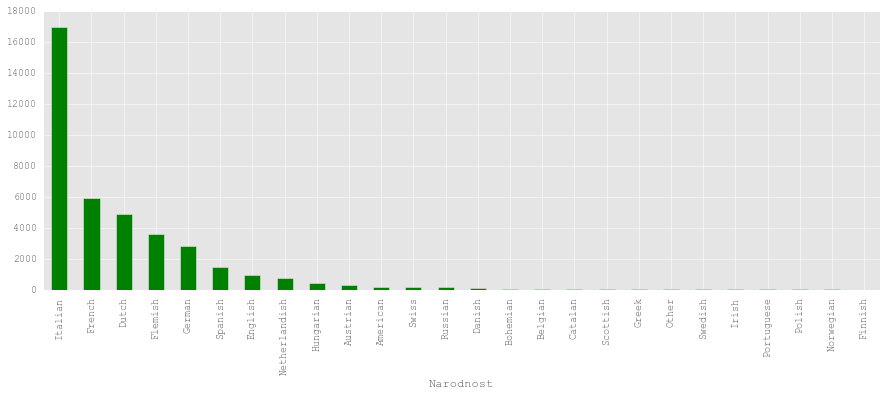

In [14]:
stevilo_narisanih_slik_narodnost=zdruzeni_tabeli.groupby('Narodnost')
stevilo_narisanih_slik_narodnost.size().sort_values(ascending=False).plot(kind='bar',color='g')

## Število umetniških del v nekem obdobju
Iz grafa je razvidno, da je bilo največ del ustvarjenih predvsem v času renesanse in baroka.

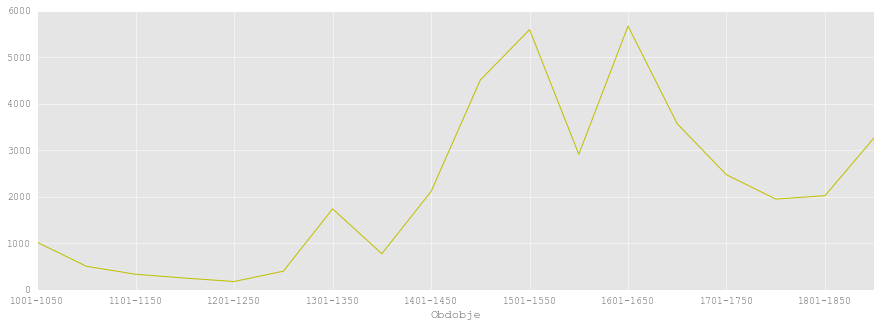

In [9]:
stevilo_narisanih_slik_obdobje=zdruzeni_tabeli.groupby('Obdobje')
stevilo_narisanih_slik_obdobje.size().plot(color='y')

## Število umetniških del po narodnosti glede na obliko
Očitno, da je največ del predvsem od italijanskih, francoskih in nizozemskih umetnikov.

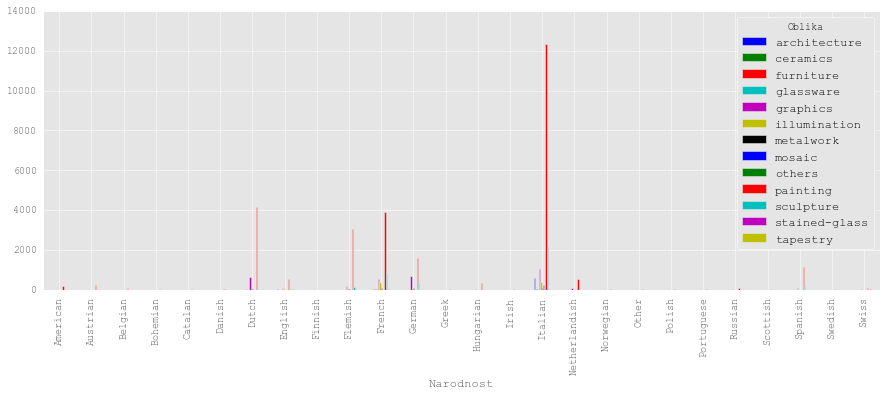

In [16]:
Oblika_glede_na_narodnost=zdruzeni_tabeli.groupby(['Narodnost','Oblika']).size()
Oblika_glede_na_narodnost.unstack().plot(kind='bar')

## Število umetniških del po obdobjih glede na obliko
Vidno prevladuje slikarstvo na splošno predvsem v obdobju baroka.

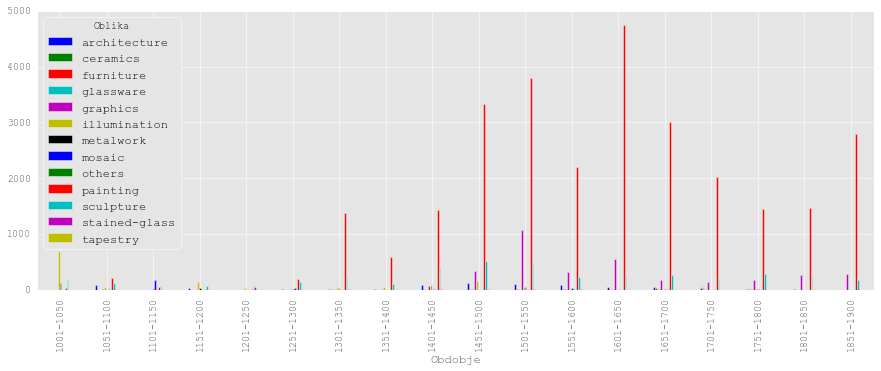

In [17]:
Oblika_glede_na_obdobje=zdruzeni_tabeli.groupby(['Obdobje','Oblika']).size()
Oblika_glede_na_obdobje.unstack().plot(kind='bar')

## Število umetniških del po narodnosti glede na tip
Spet je očitno, da je največ del italijanskih in sicer tipa religija, ki prevladuje tudi pri drugih znanih umetnikih francoskih, flamskih, španskih,...

Zanimivo, da pri nizozemcih prevladuje tip pokrajina.

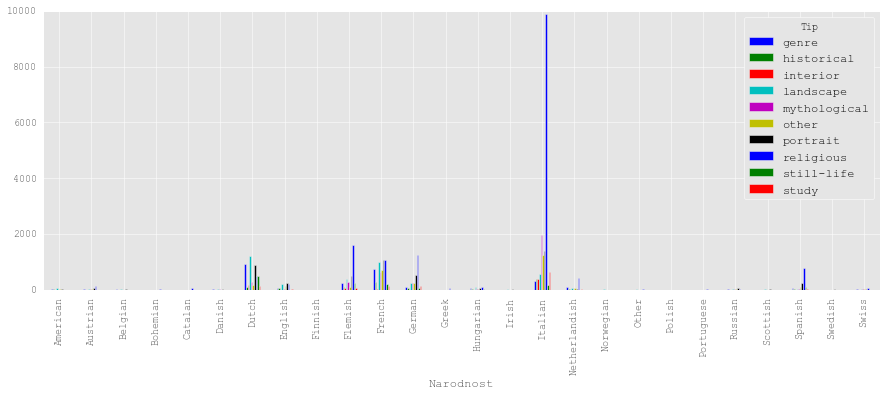

In [18]:
Tip_glede_na_narodnost=zdruzeni_tabeli.groupby(['Narodnost','Tip']).size()
Tip_glede_na_narodnost.unstack().plot(kind='bar')

## Število umetniških del po obdobjih glede na tip
Tip religija več kot očitno prevladuje v zgodovinskih obdobjih od 1001 do 1650. Zanimivo je da v obdobju 1851-1900 povečan porast zanimanja za pokrajino.

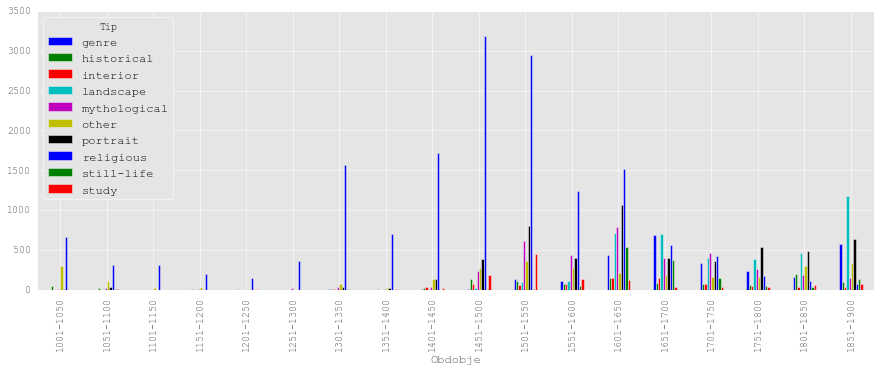

In [19]:
Tip_glede_na_obdobje=zdruzeni_tabeli.groupby(['Obdobje','Tip']).size()
Tip_glede_na_obdobje.unstack().plot(kind='bar')

## Najbolj ustvarjalni umetniki
Graf dvajset najbolj ustvarjalnih umetnikov.

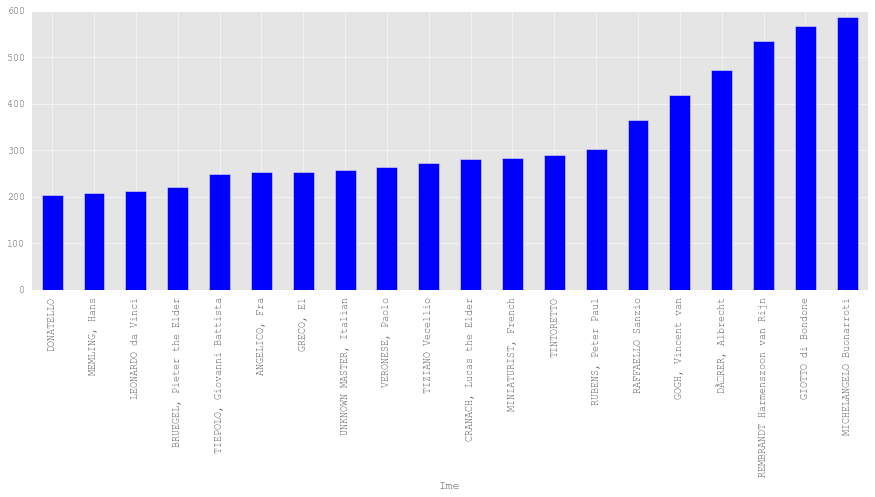

In [20]:
najvecje_stevilo_del=zdruzeni_tabeli.groupby('Ime')
najvecje_stevilo_del.size().sort_values(ascending=True).tail(20).plot(kind='bar')

## Oblika umetniškega ustvarjanja
Dejstvo je, da so se nekateri ljudje za časa svojega življenja ukvarjali tudi z drugimi oblikami umetnosti iz spodnjega grafa je spet očitno da je na prvem mestu slikarstvo potem kiparstvo nato grafika,...

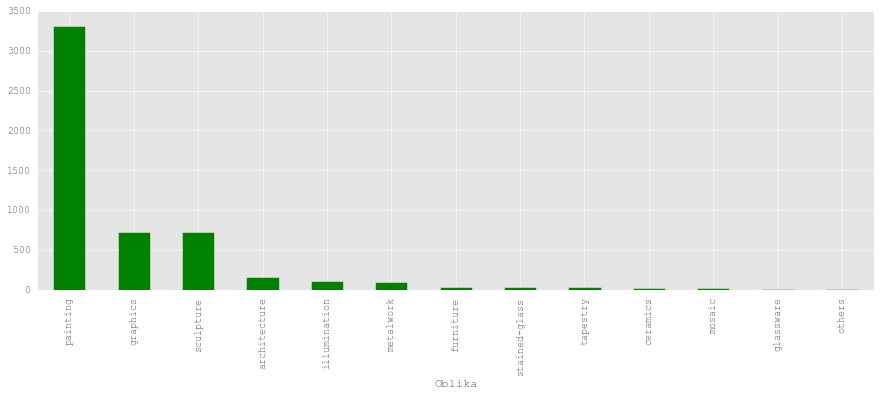

In [21]:
oblika_s_katero_so_se_ukvarjali=zdruzeni_tabeli.groupby(['Id_slikarja','Oblika']).count() #Umetniku priredimo oblike.
oblike=oblika_s_katero_so_se_ukvarjali.reset_index()[['Id_slikarja','Oblika']]#resetiramo index zanima nas le slikar in oblika
oblike.groupby('Oblika').size().sort_values(ascending=False).plot(kind='bar',color='g')#Grupiramo po oblikah
#sortiramo in narišemo.

## Iskalnik umetniških del
Vpišemo podatke o umetninah, ki jih iščemo:
* Naslov umetniškega dela
* Tehnika ustvarjanja
* Lokacija umetnine
* Oblika ustvarjanja
* Tip umetnine
* Narodnost umetnika
* Zgodovinsko obdobje

Najdene oblike umetniških del se nam izpišejo v tabeli.

In [22]:
NaslovS=''
TehnikaS=''
LokacijaS='The Hermitage, St. Petersburg'
OblikaS='painting'
TipS='landscape'
NarodnostS1='Dutch'
ObdobjeS1='1601-1650'

sez1=[NaslovS,TehnikaS,LokacijaS,OblikaS,TipS,NarodnostS1,ObdobjeS1]
sez2=['Naslov','Tehnika','Lokacija','Oblika','Tip','Narodnost','Obdobje']

i=0
filtrirano=zdruzeni_tabeli
while i!=len(sez1):
    if sez1[i]!='':
        filtrirano=filtrirano.reset_index().set_index(sez2[i]).loc[sez1[i]].set_index('Id_slikarja')
    i+=1
zbrano=filtrirano.reset_index()
prikaz=zbrano.drop(['Id_slike','Id_slikarja'],axis=1)
prikaz

,Naslov,Tehnika,Ime
0,Stormy Sea,"Oil on panel, 85 x 114 cm","WILLAERTS, Abraham"
1,Landscape with the Prophet Elijah in the Desert,"Oil on canvas, 72 x 97 cm","BLOEMAERT, Abraham"
2,Winter Landscape,"Oil on wood, 72 x 114 cm","OSTADE, Isaack van"
3,Seashore,"Oil on panel, 38 x 39 cm","VLIEGER, Simon de"
4,The Farm,"Oil on panel, 81 x 116 cm","POTTER, Paulus"
5,Landscape with Oak,"Oil on canvas, 87 x 105 cm","GOYEN, Jan van"
6,Landscape with a Peasant Cottage,"Oil on panel, 29 x 43 cm","GOYEN, Jan van"
...,...,...,...
16,Landscape with Windmill,"Oil on panel, 69 x 92 cm","NEER, Aert van der"
17,Italian Landscape with Roman Warriors,"Oil on canvas, 154 x 174 cm","BOTH, Jan"


## Prikazovalnik umetnin
Vpišemo index umetniškega dela iz prejšnje tabele in prikaže se nam njegova slika.

In [24]:
#Vnesi index umetniškega dela:
j=19

index_slikarja=zbrano.Id_slikarja.iloc[j]
index_slike=zbrano.Id_slike.iloc[j]

img=Image.open('podatki/seznam_slik/'+str(index_slikarja)+'/'+str(index_slike)+'.jpg')
img.show()

## Iskalnik umetnikov
Vpišemo podatke o umetniku, ki ga iščemo.

* Ime umetnika
* Narodnost umetnika
* Zgodovinsko obdobje

Prikaže se nam tabela umetnikov.

In [25]:
ImeS=''
NarodnostS='Danish'
ObdobjeS='1851-1900'

sez1s=[ImeS,NarodnostS,ObdobjeS]
sez2s=['Ime','Narodnost','Obdobje']

i=0
filtrirano2=slikarji
while i!=len(sez1s):
    if sez1s[i]!='':
        filtrirano2=filtrirano2.reset_index().set_index(sez2s[i]).loc[sez1s[i]].set_index('Id_slikarja')
    i+=1
zbrano2=filtrirano2.reset_index()
prikaz2=zbrano2.drop(['Id_slikarja'],axis=1)
prikaz2

,Ime
0,"ECKARDT, Christian Frederik Emil"
1,"BLOCH, Carl Heinrich"
2,"TUXEN, Laurits Regner"
3,"ANCHER, Anna Kirstine"
4,"PHILIPSEN, Theodor Esbern"
5,"AAGAARD, Carl Frederik"
6,"JOHANSEN, Viggo"
7,"JERICHAU, Jens Adolph"
8,"KR?YER, Peter Severin"
9,"JACOBSEN, Niels Hansen"


## Iskalnik umetniških del umetnika
Izberemo index umetnika iz zgornje tabele in prikaže se nam tabela njegovih del.

In [26]:
#Vnesi index umetnika:
k=5
najdi_slike_po_tem_indexu=zbrano2.Id_slikarja.iloc[k]
najdi_slike_po_tem_indexu

najdeni=slike.join(zbrano2.set_index('Id_slikarja'), on='Id_slikarja')
poiskano=najdeni.dropna()
najdene_slike_slikarja=poiskano[poiskano.Id_slikarja==najdi_slike_po_tem_indexu].reset_index()
najdene_slike_slikarja
prikaz3=najdene_slike_slikarja.drop(['Id_slike','Id_slikarja'],axis=1)
prikaz3

,Naslov,Tehnika,Lokacija,Oblika,Tip,Ime
0,The Rose Garden,"Oil on canvas, 98 x 80 cm",Private collection,painting,landscape,"AAGAARD, Carl Frederik"
1,Deer beside a Lake,"Oil on canvas, 53 x 82 cm",Private collection,painting,landscape,"AAGAARD, Carl Frederik"


## Prikazovalnik slik umetnin umetnika
Izberemo index iz prejšnje tabele in prikaže se nam slika umetnine.

In [27]:
#Vnesi index umetniškega dela umetnika:
l=1

index_slikarja=najdene_slike_slikarja.Id_slikarja.iloc[l]
index_slike=najdene_slike_slikarja.Id_slike.iloc[l]

img=Image.open('podatki/seznam_slik/'+str(index_slikarja)+'/'+str(index_slike)+'.jpg')
img.show()